In [1]:
# Import the necessary libraries for data manipulation and visualization
import numpy as np              # Library for numerical operations
import pandas as pd             # Library for data manipulation and analysis
import matplotlib.pyplot as plt # Library for creating static, animated, and interactive visualizations
import seaborn as sns           # Library for making statistical graphics in Python

# Read .csv file

In [2]:
df = pd.read_csv('testsetf.csv') #df = pd.read_csv("/kaggle/input/delhi-weather-data/testset.csv") sourse from where I bring data        
df.head()                        # Display the rows of the dataframe

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Set the Time column as the index of the dataframe

In [3]:
df.set_index(['datetime_utc'], inplace=True) # Set the 'datetime_utc' column as the index of the dataframe
df.head(2)

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN


# Fatch only 2 set time & temp

In [4]:
# taking only temperature feature as values and datetime feature as index in the dataframe 
df = pd.read_csv('testsetf.csv')
data = pd.DataFrame(list(df['_tempm']), index=df['datetime_utc'], columns=['temp'])
data.head(4)

,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0


# Group (month by month) and (year by year)

In [5]:
df = pd.read_csv('testsetf.csv')   # Load the dataset

# Load the dataset, parsing the 'datetime_utc' column as datetime objects
df = pd.read_csv("testsetf.csv", parse_dates= ["datetime_utc"])

# Create a new DataFrame 'data' with the '_tempm' column as the temperature values and 'datetime_utc' as the index
data = pd.DataFrame(list(df['_tempm']), index=df['datetime_utc'], columns=['temp'])
data.head(4)

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0


In [6]:
avg_month = data.resample('m').mean()  # Resampling data with date frequency (month by month)
avg_month.head(4)

,temp
datetime_utc,
1996-11-30,19.438944
1996-12-31,13.816794
1997-01-31,12.871118
1997-02-28,15.778777


In [7]:
avg_year = data.resample('y').mean()  # Resampling data with date frequency (year by year)
avg_year.head(4)

,temp
datetime_utc,
1996-12-31,16.518636
1997-12-31,24.444635
1998-12-31,24.830413
1999-12-31,27.332534


In [8]:
avg_year = avg_month.resample('y').mean()  # resampling data with date frequency (year by year)
avg_year.head(4)                           # This and above are same result but this reduce timecomplexicity 

,temp
datetime_utc,
1996-12-31,16.627869
1997-12-31,23.794779
1998-12-31,24.365823
1999-12-31,26.043992


In [9]:
y = avg_year['1998':'2002']   # y = avg_year['1997-12-31':'2016-12-31']   # slicing
y.head()

,temp
datetime_utc,
1998-12-31,24.365823
1999-12-31,26.043992
2000-12-31,25.440720
2001-12-31,25.552616
2002-12-31,26.472596


In [10]:
y = avg_year['1998':'2010':4]  # y = avg_year['1997-12-31':'2016-12-31': Gap]
y

,temp
datetime_utc,
1998-12-31,24.365823
2002-12-31,26.472596
2006-12-31,25.384738
2010-12-31,25.604612


# Bar graph (Temp v/s Months)

<Axes: xlabel='datetime_utc', ylabel='temp'>

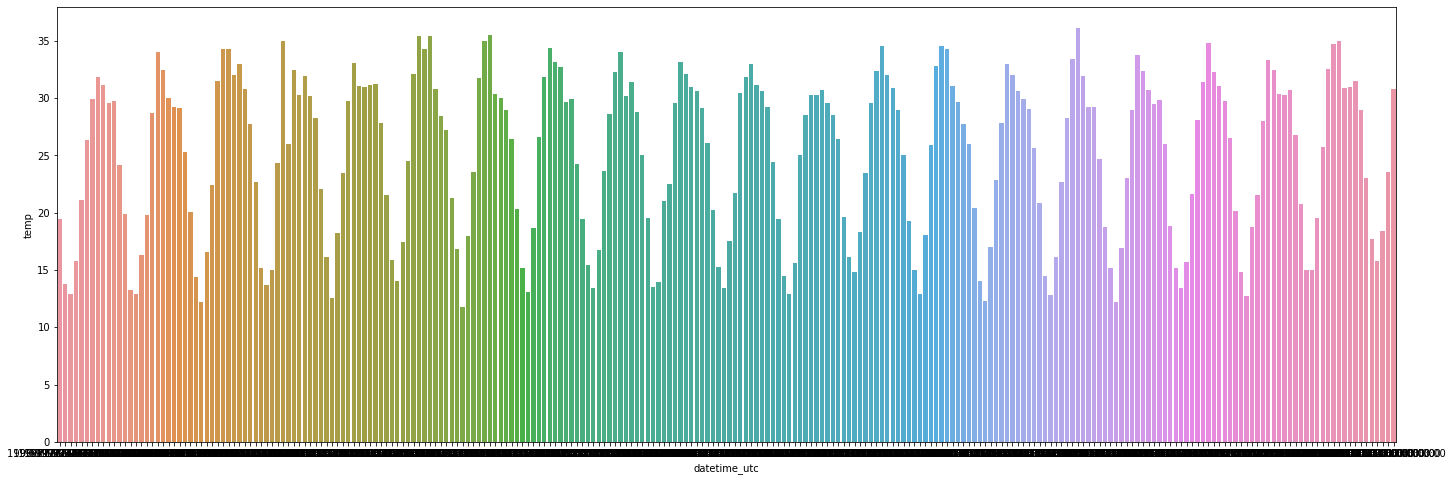

In [11]:
plt.figure(figsize= (24,8))
sns.barplot(x=avg_month.index, y=avg_month['temp'])

<Axes: xlabel='datetime_utc', ylabel='temp'>

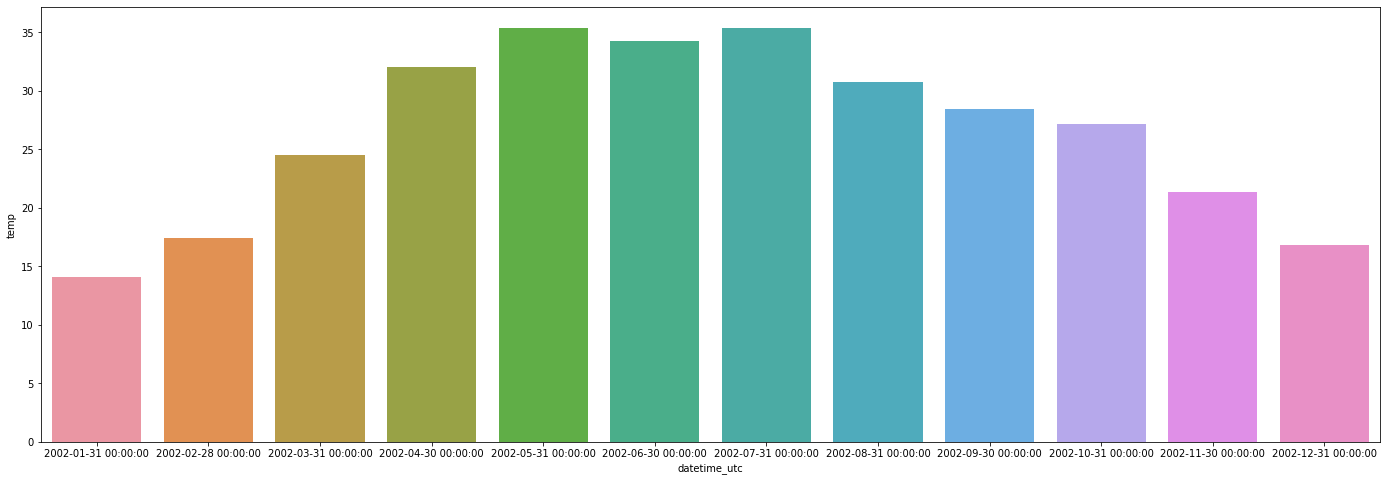

In [12]:
m = avg_month['2002-01-01':'2002-12-31'] # After slicing you can see spacific years
plt.figure(figsize= (24,8))
sns.barplot(x=m.index, y=m['temp'])

# Mean & Standered Deviation

In [13]:
mean = data.mean()   # Mean
print(mean)

temp    25.449382
dtype: float64


In [14]:
std=data.std()       # Standered Deviation
std

temp    8.477906
dtype: float64

# Average monthly temperature in Delhi from 1997 to 2016

In [15]:
df = pd.read_csv("testsetf.csv")  # read data
df = pd.read_csv("testsetf.csv", parse_dates= ["datetime_utc"]) # Date formet
df.head(2)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [16]:
data = pd.DataFrame(list(df['_tempm']), index=df['datetime_utc'], columns=['temp']) # taking date and time only
avg_month = data.resample('m').mean()
avg_month.head(4)

,temp
datetime_utc,
1996-11-30,19.438944
1996-12-31,13.816794
1997-01-31,12.871118
1997-02-28,15.778777


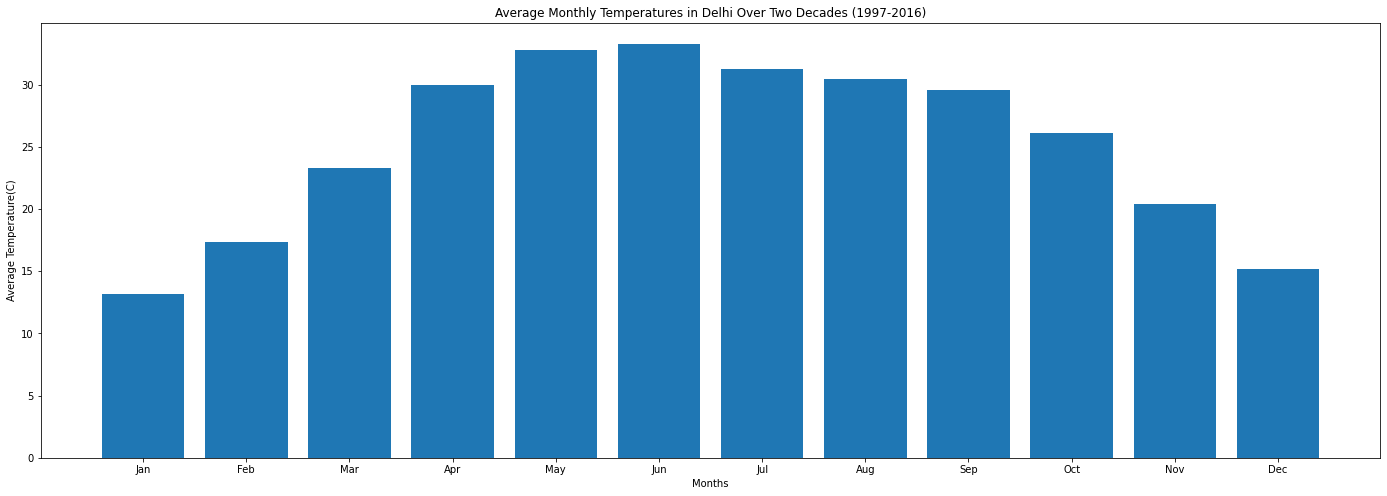

In [17]:
df = pd.read_csv("testsetf.csv")  # Read data from CSV file

# Read data again with 'datetime_utc' parsed as datetime objects
df = pd.read_csv("testsetf.csv", parse_dates= ["datetime_utc"])

# Create a new DataFrame 'data' with 'datetime_utc' as the index and '_tempm' as the temperature column
data = pd.DataFrame(list(df['_tempm']), index=df['datetime_utc'], columns=['temp'])

# Resample data to monthly frequency and calculate the mean temperature for each month
avg_month = data.resample('m').mean()                           

jan = avg_month['1997-01':'2016':12]  # Select average temperatures for each month over the years 1997-2016
feb = avg_month['1997-02':'2016':12]
mar = avg_month['1997-03':'2016':12]
apr = avg_month['1997-04':'2016':12]
may = avg_month['1997-05':'2016':12]
jun = avg_month['1997-06':'2016':12]
jul = avg_month['1997-07':'2016':12]
aug = avg_month['1997-08':'2016':12]
sep = avg_month['1997-09':'2016':12]
oct_ = avg_month['1997-10':'2016':12]
nov = avg_month['1997-11':'2016':12]
dec = avg_month['1997-12':'2016':12]

A = jan.mean()  # Calculate the mean temperature for each month
B = feb.mean()
C = mar.mean()
D = apr.mean()
E = may.mean()
F = jun.mean()
G = jul.mean()
H = aug.mean()
I = sep.mean()
J = oct_.mean()
K = nov.mean()
L = dec.mean()

data = np.vstack((A, B, C, D, E, F, G, H, I, J, K, L)) # Stack the monthly averages into a single array
monthly_averages = np.mean(data, axis=1)  # Calculate the average temperature for each month across all years
# Define the month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(24, 8))
ax.bar(months, monthly_averages)

# Set the labels and title for the chart
ax.set_xlabel('Months')
ax.set_ylabel('Average Temperature(C)')
ax.set_title('Average Monthly Temperatures in Delhi Over Two Decades (1997-2016)')
plt.show()

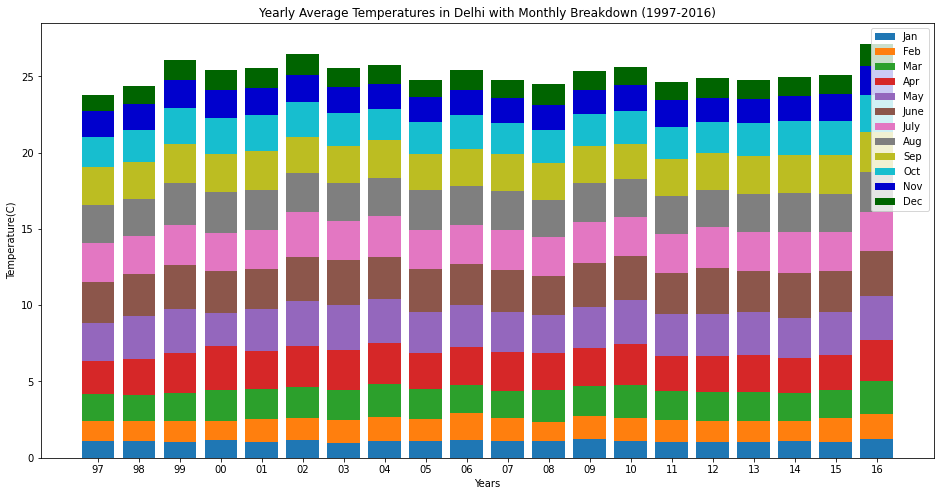

In [18]:
df = pd.read_csv("testsetf.csv")                        # Load the dataset
df['datetime_utc'] = pd.to_datetime(df['datetime_utc']) # Convert the 'datetime_utc' column to datetime objects
data = pd.DataFrame(list(df['_tempm']), index=df['datetime_utc'], columns=['temp']) # Create a new DataFrame 'data' with the '_tempm' column as temperature values and 'datetime_utc' as the index
avg_month = data.resample('m').mean()                   # Resample the data to monthly frequency and calculate the mean temperature for each month

# List of years for labeling the x-axis
year = ['97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']

A = avg_month['1997-01':'2016-12':12]  # All Jan  #Extract average temperatures for each month across all years
B = avg_month['1997-02':'2016-12':12]  # All Feb
C = avg_month['1997-03':'2016-12':12]         
D = avg_month['1997-04':'2016-12':12]
E = avg_month['1997-05':'2016-12':12]
F = avg_month['1997-06':'2016-12':12]
G = avg_month['1997-07':'2016-12':12]
H = avg_month['1997-08':'2016-12':12]
I = avg_month['1997-09':'2016-12':12]
J = avg_month['1997-10':'2016-12':12]
K = avg_month['1997-11':'2016-12':12]  # All Nov
L = avg_month['1997-12':'2016-12':12]  # All Dec

a = A.temp   # Extract temperature values for each month
b = B.temp
c = C.temp
d = D.temp
e = E.temp
f = F.temp
g = G.temp
h = H.temp
o = I.temp
j = J.temp
k = K.temp
l = L.temp
          # Stack the monthly temperatures for each year, normalized by dividing by 12
data = np.vstack((a / 12, b / 12, c / 12, d / 12, e / 12, f / 12, g / 12, h / 12, o / 12, j / 12, k / 12, l / 12))
          # Labels and colors for each month
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'mediumblue', 'darkgreen']

fig, ax = plt.subplots(figsize=(16, 8))  # Create a figure and axis for the plot

ax.bar(year, data[0], color=colors[0], label=labels[0])  # Plot the bar chart for each month
for i in range(1, len(data)):
    ax.bar(year, data[i], bottom=np.sum(data[:i], axis=0), color=colors[i], label=labels[i])

ax.set_xlabel('Years')           # Set the x-axis label
ax.set_ylabel('Temperature(C)')
ax.set_title('Yearly Average Temperatures in Delhi with Monthly Breakdown (1997-2016)')
ax.legend()                      # Add a legend to the plot
plt.show()                       # Display the plot

# Temp v/s Days

<Axes: title={'center': 'Temperature in Delhi from 1996 to 2017 w.r.t Day(in X-axis)'}, xlabel='Day', ylabel='Temperature(C)'>

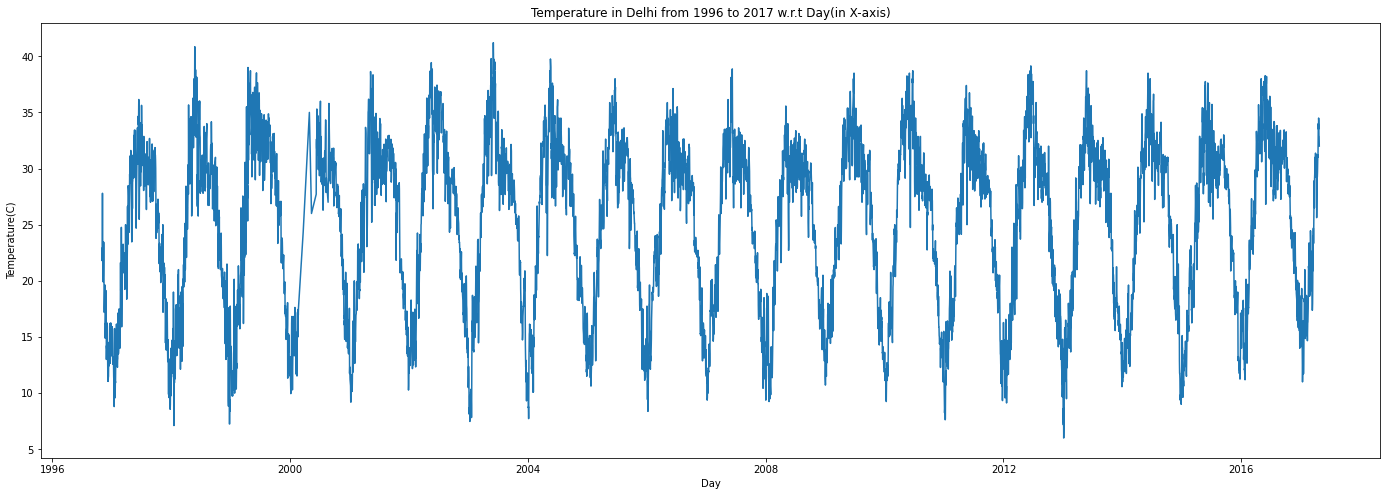

In [19]:
df = pd.read_csv("testsetf.csv")
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
data = pd.DataFrame(list(df['_tempm']), index=df['datetime_utc'], columns=['temp'])
avg_day = data.resample('d').mean()
plt.figure(figsize= (24,8))

# Labels and title
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Temperature in Delhi from 1996 to 2017 w.r.t Day(in X-axis)')

sns.lineplot(x=avg_day.index, y=avg_day['temp'])

<Axes: title={'center': 'Temperature in Delhi from 1996 to 2017 w.r.t Year(in X-axis)'}, xlabel='Day', ylabel='Temperature(C)'>

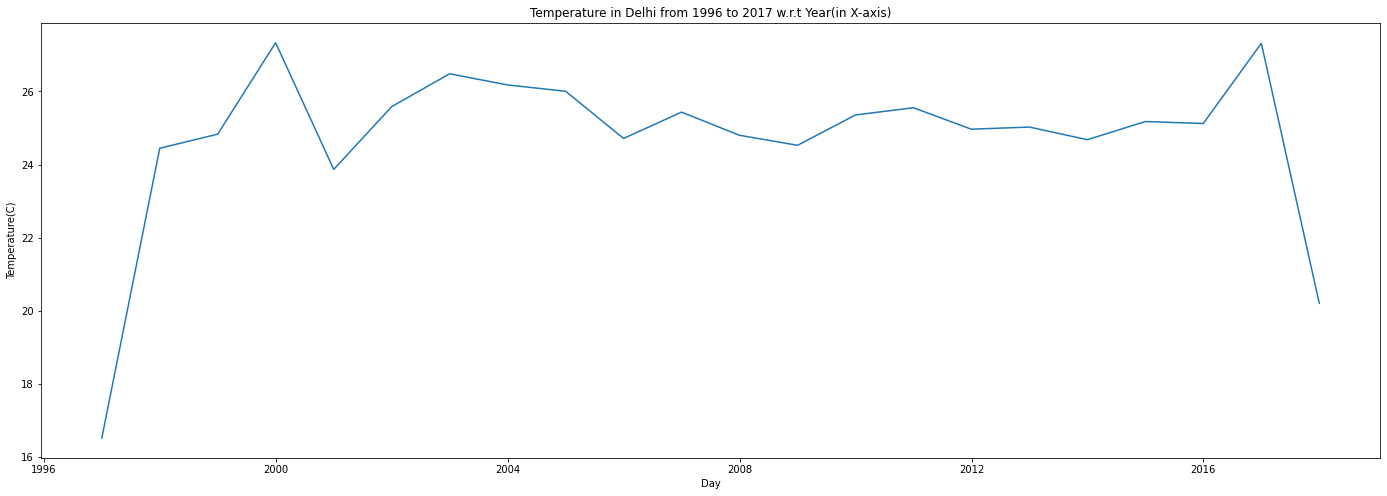

In [20]:
# In main data 1996 and 2017 whole month data is not collected so in lower these years are removed
avg_year = data.resample('Y').mean()
plt.figure(figsize= (24,8))

# Labels and title
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Temperature in Delhi from 1996 to 2017 w.r.t Year(in X-axis)')


sns.lineplot(x=avg_year.index, y=avg_year['temp'])

<Axes: xlabel='datetime_utc', ylabel='temp'>

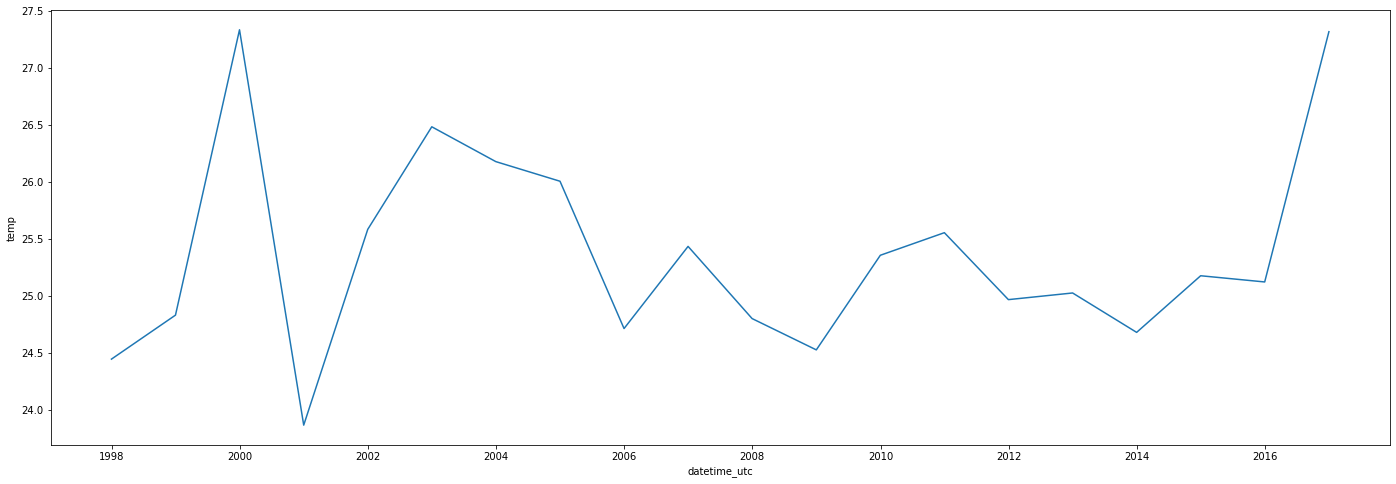

In [21]:
avg_year = avg_year['1997':'2016']  
plt.figure(figsize= (24,8))
sns.lineplot(x=avg_year.index, y=avg_year['temp'])

# Daily MAX, Daily Average, Daily MIN (TENPERATURE)

In [22]:
# Resample the data to daily frequency and calculate the maximum temperature for each day
daily_max = data.resample('d').max()
daily_max.head(4)

,temp
datetime_utc,
1996-11-01,30.0
1996-11-02,31.0
1996-11-03,29.0
1996-11-04,29.0


In [23]:
daily_avg = data.resample('d').mean()
daily_avg.head(4)

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222


In [24]:
daily_min = data.resample('d').min()
daily_min.head(4)

,temp
datetime_utc,
1996-11-01,19.0
1996-11-02,17.0
1996-11-03,16.0
1996-11-04,15.0


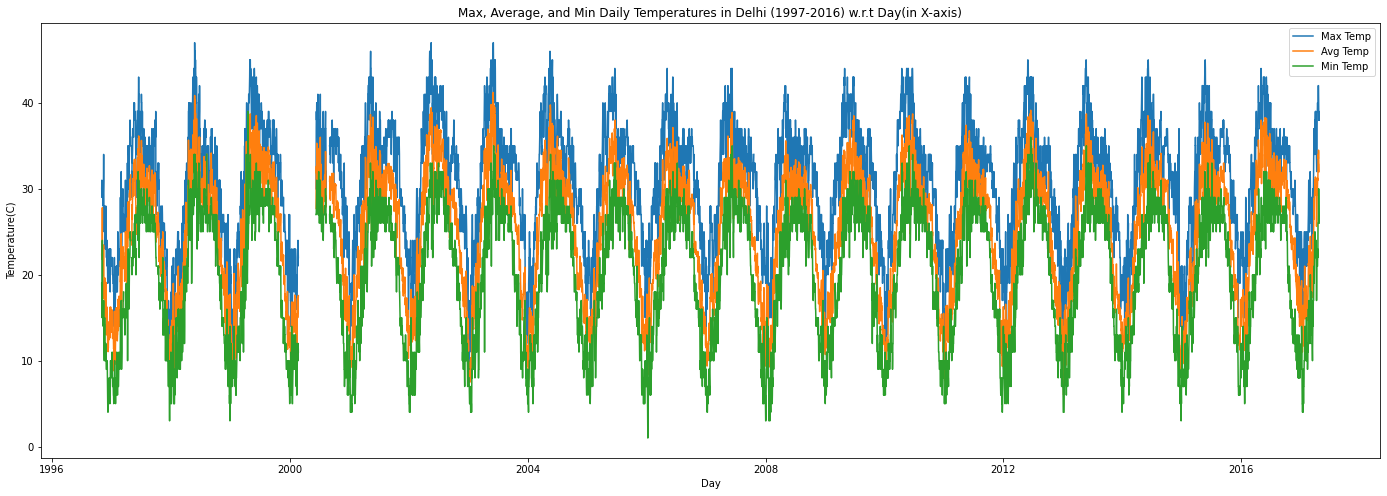

In [25]:
plt.figure(figsize=(24, 8))

plt.plot(daily_max.index, daily_max, label='Max Temp')
plt.plot(daily_avg.index, daily_avg, label='Avg Temp')
plt.plot(daily_min.index, daily_min, label='Min Temp')

# Labels and title
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Max, Average, and Min Daily Temperatures in Delhi (1997-2016) w.r.t Day(in X-axis)')

plt.legend()

/var/folders/7m/3_wyf70n09zfl80wl2bdg87c0000gn/T/ipykernel_44799/1574689649.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d=data['2015-06-12 11:00:00':'2015-06-28 11:00:00']


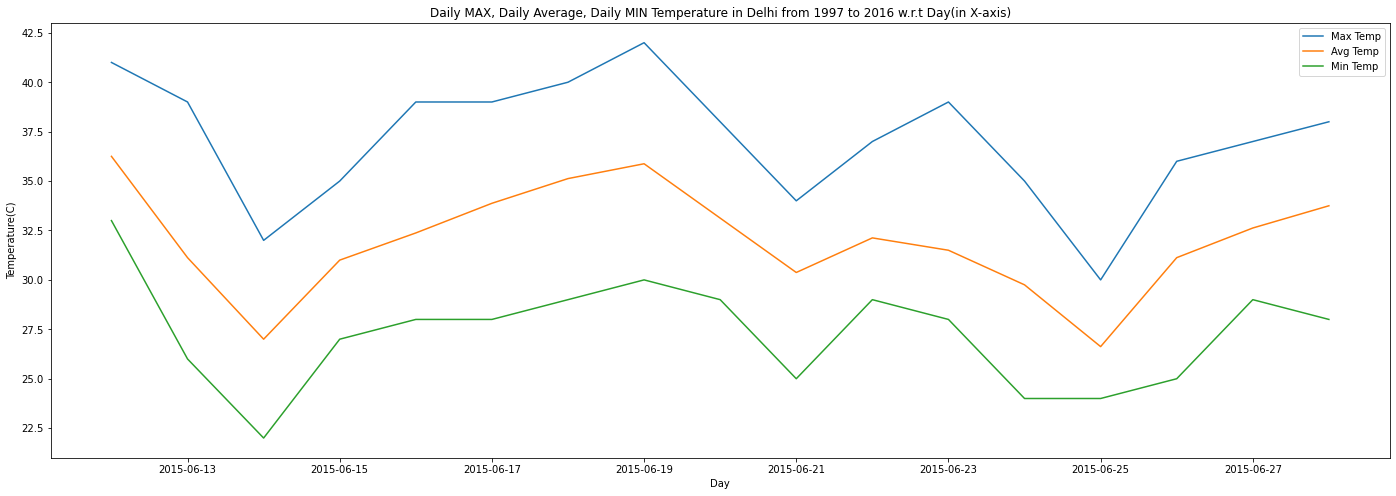

In [26]:
d=data['2015-06-12 11:00:00':'2015-06-28 11:00:00']
dailymax = d.resample('d').max()
dailyavg = d.resample('d').mean()
dailymin = d.resample('d').min()
plt.figure(figsize=(24, 8))

plt.plot(dailymax.index, dailymax, label='Max Temp')
plt.plot(dailyavg.index, dailyavg, label='Avg Temp')
plt.plot(dailymin.index, dailymin, label='Min Temp')

# Labels and title
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Daily MAX, Daily Average, Daily MIN Temperature in Delhi from 1997 to 2016 w.r.t Day(in X-axis)')

plt.legend()

# Heat_map of Average Tempearture of day in Delhi from 1996 to 2017

In [27]:
df = pd.read_csv('testsetf.csv') # Load the dataset
df.head (2)                      # Display the first two rows of the dataframe

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [28]:
# A function to extract the month part from the datetime string
def get_month(x):
  return x[4:6]

In [29]:
# Create a new column 'month' by applying the get_month function to 'datetime_utc'
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))
df['month']#.head (4)

0         11
1         11
2         11
3         11
4         11
          ..
100988    04
100989    04
100990    04
100991    04
100992    04
Name: month, Length: 100993, dtype: object

In [30]:
# A function to extract the day part from the datetime string
def get_day(x):
  return x[6:8]

In [31]:
# Create a new column 'day' by applying the get_day function to 'datetime_utc'
df['day'] = df['datetime_utc'].apply(lambda x: get_day(str(x)))
df['day'].head(2)

0    01
1    01
Name: day, dtype: object

In [32]:
# Create a new column 'month' by applying the get_month function to 'datetime_utc'  & similarly day
temp_month = pd.crosstab(df['month'], df['day'], values=df['_tempm'], aggfunc='min')
temp_day = pd.crosstab(df['day'], df['day'], values=df['_tempm'], aggfunc='min')

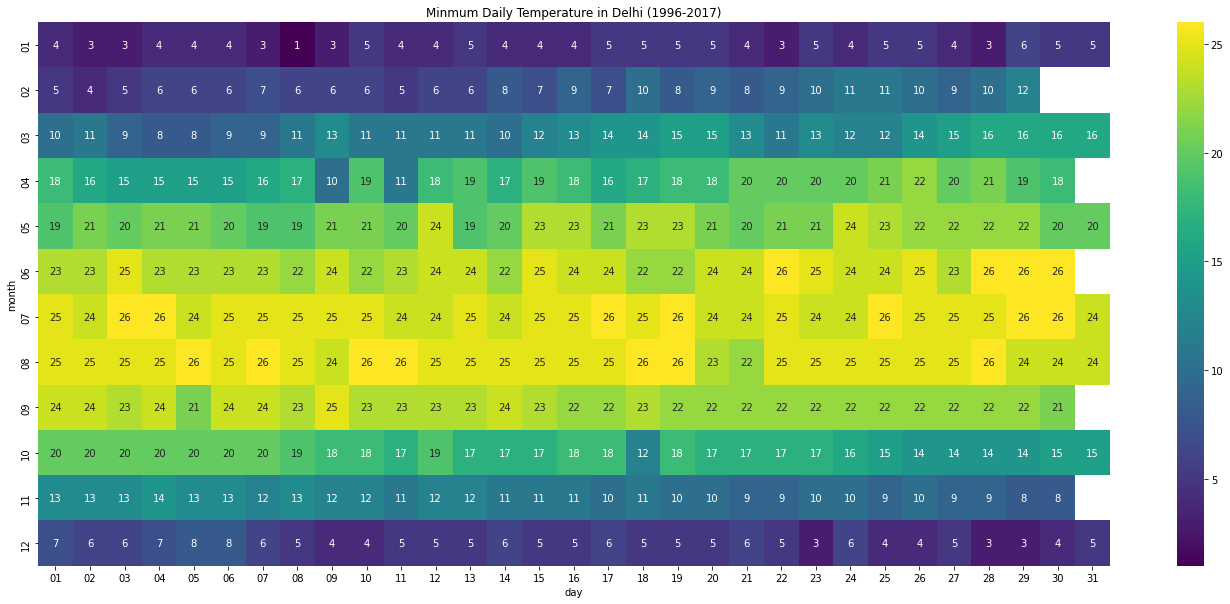

In [33]:
plt.figure(figsize=(24, 10)) # Plot the heatmap for average temperature by month and day
sns.heatmap(temp_month, cmap='viridis', annot=True)
plt.title("Minmum Daily Temperature in Delhi (1996-2017)")
plt.show()

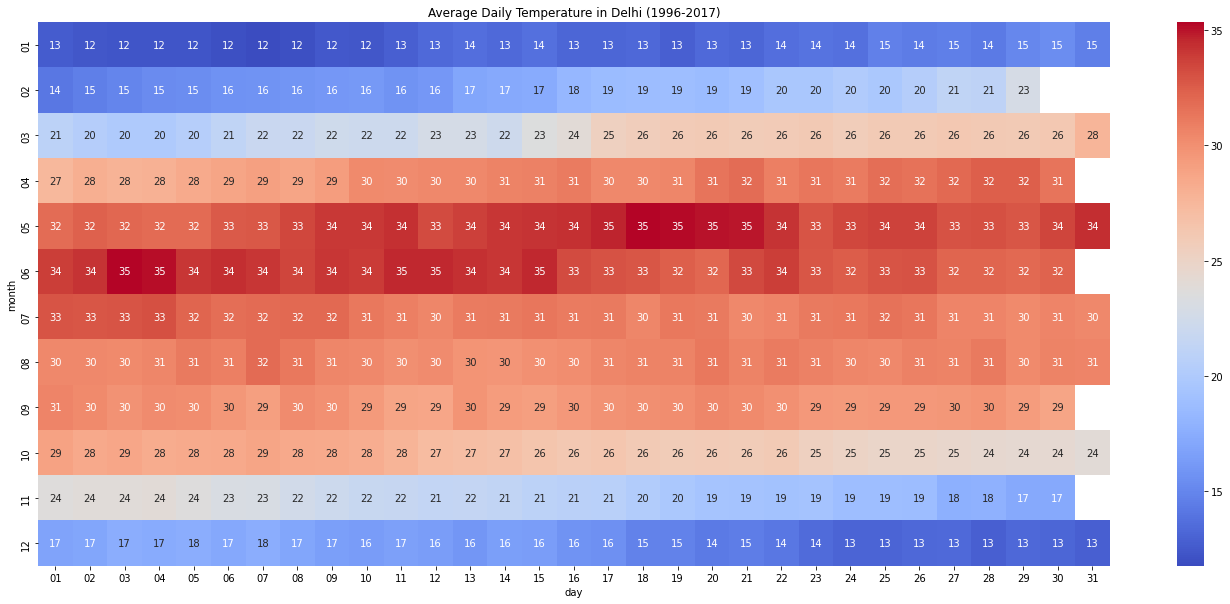

In [34]:
df = pd.read_csv('testsetf.csv')  # Load the dataset

def get_month(x):  # A function to extract the month part from the datetime string
  return x[4:6]
def get_day(x):    # A function to extract the day part from the datetime string
  return x[6:8]

# Create a new column 'day' by applying the get_day function to 'datetime_utc'
df['day'] = df['datetime_utc'].apply(lambda x: get_day(str(x)))
# Create a new column 'month' by applying the get_month function to 'datetime_utc'
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

# Create a crosstab to compute the average temperature ('_tempm') for each month and day
temp_month = pd.crosstab(df['month'], df['day'], values=df['_tempm'], aggfunc='mean')
# Create a crosstab to compute the average temperature ('_tempm') for each day
temp_day = pd.crosstab(df['day'], df['day'], values=df['_tempm'], aggfunc='mean')

# Plot the heatmap for average temperature by month and day
plt.figure(figsize=(24, 10))
sns.heatmap(temp_month, cmap='coolwarm', annot=True)
plt.title("Average Daily Temperature in Delhi (1996-2017)")
plt.show()

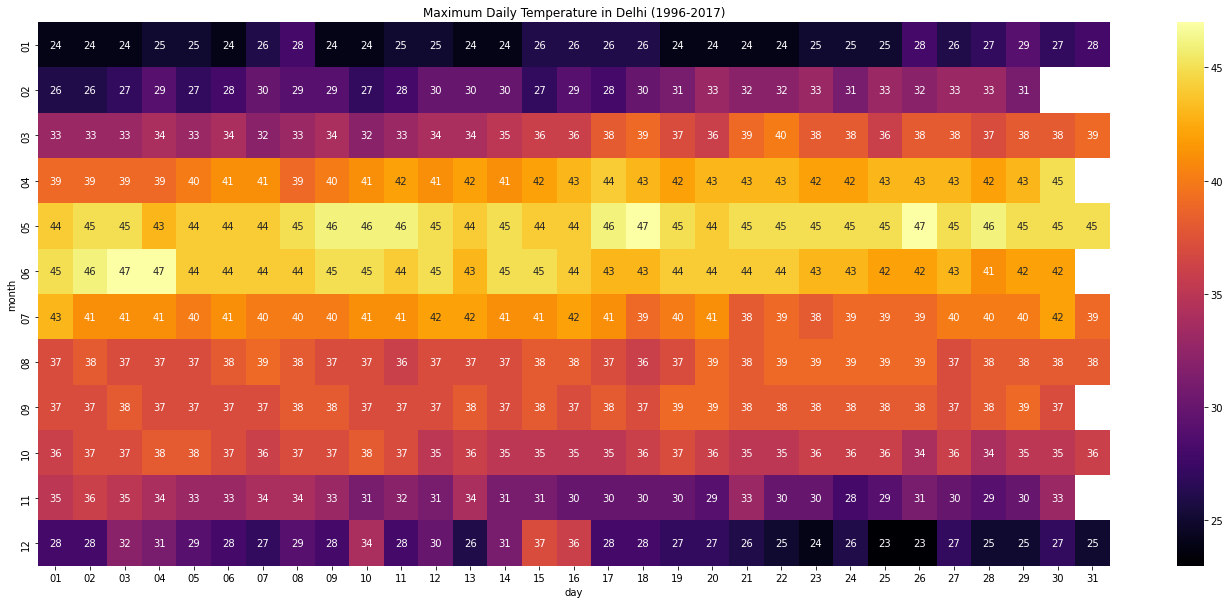

In [35]:
temp_month = pd.crosstab(df['month'], df['day'], values=df['_tempm'], aggfunc='max')
temp_day = pd.crosstab(df['day'], df['day'], values=df['_tempm'], aggfunc='max')


plt.figure(figsize=(24, 10))
sns.heatmap(temp_month, cmap='inferno', annot=True)
plt.title("Maximum Daily Temperature in Delhi (1996-2017)")
plt.show()

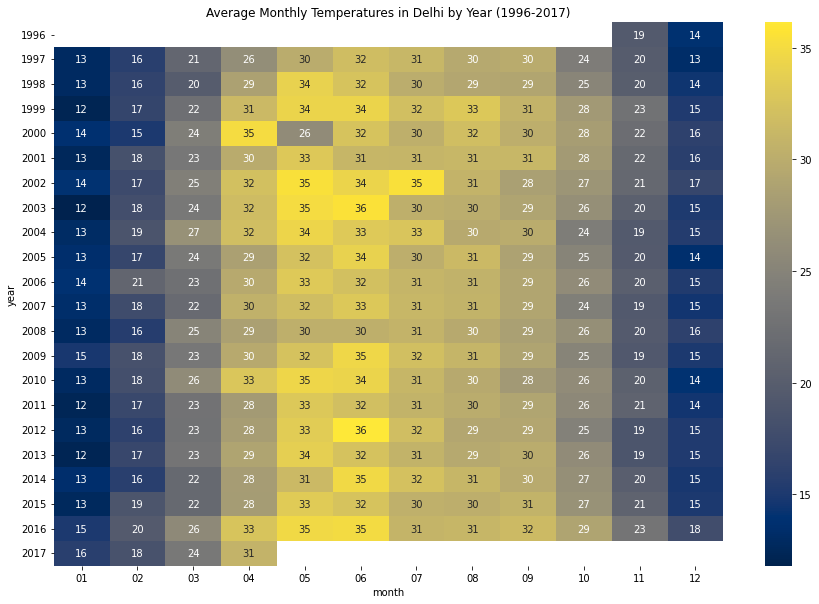

In [36]:
def get_year(x): # A function to extract the year part from the datetime string
  return x[0:4]

df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
temp_year = pd.crosstab(df['year'], df['month'], values=df['_tempm'], aggfunc='mean')

plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='cividis', annot=True)
plt.title("Average Monthly Temperatures in Delhi by Year (1996-2017)")
plt.show()

# Correlations

<Axes: >

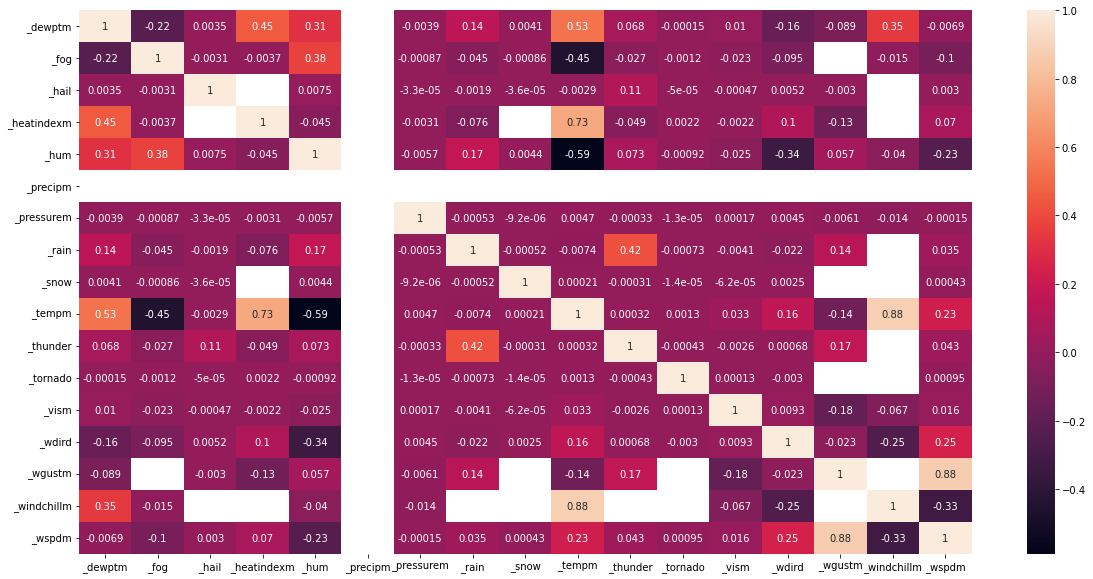

In [37]:
d=pd.read_csv('testsetf.csv')
d.set_index(['datetime_utc'], inplace=True)
plt.figure(figsize=(20,10))
sns.heatmap(d.corr(numeric_only=True), annot=True)

# Other information about data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100993 non-null  object 
 1   _conds        100921 non-null  object 
 2   _dewptm       100372 non-null  float64
 3   _fog          100993 non-null  int64  
 4   _hail         100993 non-null  int64  
 5   _heatindexm   29155 non-null   float64
 6   _hum          100236 non-null  float64
 7   _precipm      0 non-null       float64
 8   _pressurem    100761 non-null  float64
 9   _rain         100993 non-null  int64  
 10  _snow         100993 non-null  int64  
 11  _tempm        100320 non-null  float64
 12  _thunder      100993 non-null  int64  
 13  _tornado      100993 non-null  int64  
 14  _vism         96565 non-null   float64
 15  _wdird        86238 non-null   float64
 16  _wdire        86238 non-null   object 
 17  _wgustm       1072 non-null    float64
 18  _win

In [39]:
d = pd.read_csv('testsetf.csv', parse_dates= ['datetime_utc'])
d.set_index(['datetime_utc'], inplace=True)
d.describe() #statistics

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100372.000000,100993.000000,100993.000000,29155.000000,100236.000000,0.0,1.007610e+05,100993.000000,100993.000000,100320.000000,100993.000000,100993.00000,96565.000000,86238.000000,1072.000000,579.000000,98635.000000
mean,15.740944,0.069688,0.000129,35.651710,57.909304,NaN,1.932304e+03,0.026259,0.000010,25.449382,0.009426,0.00002,2.402808,163.555069,37.671175,5.713817,7.678455
std,7.058644,0.254622,0.011345,5.015384,23.807436,NaN,3.183739e+05,0.159906,0.003147,8.477906,0.096631,0.00445,20.745706,120.003098,6.848666,1.203290,11.931976
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,47.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [40]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100993 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    100320 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


Index(['temp'], dtype='object')